In [36]:
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency, wilcoxon, friedmanchisquare, mannwhitneyu, kruskal, chi2_contingency
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

import seaborn as sns
%matplotlib inline


In [20]:
df= pd.read_csv('general_data.csv')

In [21]:
df.head(10) #First 6 rows of df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [14]:
df.describe() #General description of the data

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [15]:
df.isna() #Checking NA/Null values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.dropna(axis=0) #Drop NA values from columns


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


In [31]:
display(df.info()) #Checking data type of attributes in the data.
#It will guide me through selecting variables for tests.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

None

In [23]:
df.Attrition = df.Attrition.replace(['Yes','No'],[1,0]) #Replaceing Attrition events as 1 and rest as 0.

In [24]:
df.Attrition.head(20) #Checking replacement

0     0
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
Name: Attrition, dtype: int64

In [27]:
skewness= df.skew() #Checking skewness
skewness

Age                        0.413005
Attrition                  1.843111
DistanceFromHome           0.957466
Education                 -0.289484
EmployeeCount              0.000000
EmployeeID                 0.000000
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.026767
PercentSalaryHike          0.820569
StandardHours              0.000000
StockOptionLevel           0.968321
TotalWorkingYears          1.116832
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
dtype: float64

In [28]:
kurtosis= df.kurtosis() #Checking Peakness, Kurtosis
kurtosis

Age                       -0.405951
Attrition                  1.397690
DistanceFromHome          -0.227045
Education                 -0.560569
EmployeeCount              0.000000
EmployeeID                -1.200000
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.007287
PercentSalaryHike         -0.302638
StandardHours              0.000000
StockOptionLevel           0.361086
TotalWorkingYears          0.912936
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
dtype: float64

In [50]:
corr= df.corr() #Checking correlation across attributes
corr


,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,-0.010290,-0.031176,0.042345,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,0.042345,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864


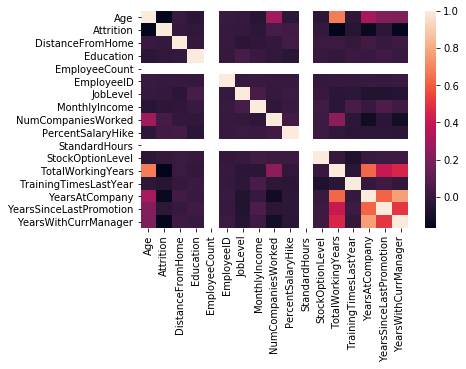

In [51]:
heatmap= sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns) #visualization of correlation


## Chi-Square Test

In [64]:
#Chi-Squared test 
#Gender and Attrition
crosstable1 = pd.crosstab(df.Attrition,df.Gender)
crosstable1


Gender,Female,Male
Attrition,,
0,1494,2205
1,270,441


In [66]:
stats, p, dof, expected = chi2_contingency(crosstable1)
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Gender impacts Attrition')
else:
    print('Gender doesn\'t impact Attrition')

The Value of p in chi2_contingency test is: 0.24529482862926827
Gender doesn't impact Attrition


In [67]:
#Chi-Squared test 
#Department and Attrition
crosstable2 = pd.crosstab(df.Attrition,df.Department)
crosstable2


Department,Human Resources,Research & Development,Sales
Attrition,,,
0,132,2430,1137
1,57,453,201


In [72]:
stats, p, dof, expected = chi2_contingency(crosstable2)
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Department impacts Attrition')
else:
    print('Department doesn\'t impact Attrition_')

The Value of p in chi2_contingency test is: 4.820888218170406e-07
Department impacts Attrition


In [73]:
#Chi-Squared test 
#Marital Status and Attrition
crosstable3 = pd.crosstab(df.Attrition,df.MaritalStatus)
crosstable3


MaritalStatus,Divorced,Married,Single
Attrition,,,
0,882,1767,1050
1,99,252,360


In [74]:
stats, p, dof, expected = chi2_contingency(crosstable3)
print(f'The Value of p in chi2_contingency test is: {p}')
if p < 0.05:
    print('Marital Status impacts Attrition')
else:
    print('Marital Status doesn\'t impact Attrition_')

The Value of p in chi2_contingency test is: 8.45385940605786e-31
Marital Status impacts Attrition


## Mann Whitney U Test

In [78]:
Att_yes= df[df['Attrition']== 1]
Att_yes

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
6,28,1,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
13,47,1,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9
28,44,1,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,3.0,Y,14,8,1,19.0,2,1,0,0
30,26,1,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2.0,Y,11,8,0,5.0,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,1,Travel_Rarely,Research & Development,7,1,Life Sciences,1,4382,Female,...,1.0,Y,21,8,0,4.0,2,4,0,1
4386,33,1,Travel_Rarely,Sales,11,4,Marketing,1,4387,Male,...,5.0,Y,21,8,0,8.0,2,5,0,4
4388,33,1,Travel_Rarely,Sales,1,3,Life Sciences,1,4389,Male,...,7.0,Y,11,8,0,13.0,2,9,1,7
4391,32,1,Travel_Rarely,Sales,23,1,Life Sciences,1,4392,Male,...,0.0,Y,11,8,0,4.0,2,3,1,2


In [79]:
Att_not= df[df['Attrition']== 0]
Att_not

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [82]:
stats, p = mannwhitneyu(Att_yes.DistanceFromHome, Att_not.DistanceFromHome)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')

The Value of p in mannwhitneyu test is: 0.4629185205822659
There is no significant impact


In [84]:
stats, p = mannwhitneyu(Att_yes.YearsAtCompany, Att_not.YearsAtCompany)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')

The Value of p in mannwhitneyu test is: 6.047598261692858e-37
There is significant impact


In [86]:
stats, p = mannwhitneyu(Att_yes.YearsAtCompany, Att_not.StockOptionLevel)
print(f'The Value of p in mannwhitneyu test is: {p}')
if p < 0.05:
    print('There is significant impact')
else:
    print('There is no significant impact')

The Value of p in mannwhitneyu test is: 7.878203086425128e-204
There is significant impact
